In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle


label_fontsize = 32
directory = '/scratch/ys3202/ps_results'
import os
if not os.path.exists(directory):
    os.makedirs(directory)
    
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

def power_spectrum_np(cube, mean_raw_cube, SubBoxSize):

    nc = cube.shape[2] # define how many cells your box has
    delta = cube/mean_raw_cube - 1.0

    # get P(k) field: explot fft of data that is only real, not complex
    delta_k = np.abs(np.fft.rfftn(delta)) 
    Pk_field =  delta_k**2

    # get 3d array of index integer distances to k = (0, 0, 0)
    dist = np.minimum(np.arange(nc), np.arange(nc,0,-1))
    dist_z = np.arange(nc//2+1)
    dist *= dist
    dist_z *= dist_z
    dist_3d = np.sqrt(dist[:, None, None] + dist[:, None] + dist_z)

    
    ################ NEW #################
    dist_3d  = np.ravel(dist_3d)
    Pk_field = np.ravel(Pk_field)
    
    k_bins = np.arange(nc//2+1)
    k      = 0.5*(k_bins[1:] + k_bins[:-1])*2.0*np.pi/SubBoxSize
    
    Pk     = np.histogram(dist_3d, bins=k_bins, weights=Pk_field)[0]
    Nmodes = np.histogram(dist_3d, bins=k_bins)[0]
    Pk     = (Pk/Nmodes)*(SubBoxSize/nc**2)**3
    
    k = k[1:];  Pk = Pk[1:]
    
    return k, Pk

In [38]:
# target=np.load('/scratch/xz2139/Target_R2Unet.npy')
# t_k,t_pk0=power_spectrum_np(target,target.mean(), 106.5)
# p_dict['target'] = (t_k,t_pk0)

In [2]:
p_dict = pickle.load(open(directory + '/p_dict.p', "rb" ))
def all_power_spectrum(models_list, ps = None, SubBoxSize = 106.5):
    if not ps:
        ps = {}
    for model_name in models_list:
        if model_name[-1] != 'h':
            prediction=np.load('/scratch/yw1007/dark_matter/predictions_' + model_name + '.npy')
        else:
            prediction=np.load('/scratch/ys3202/predictions_' + model_name + '.npy')
        p,p_pk=power_spectrum_np(prediction,prediction.mean(), SubBoxSize)
        ps[model_name] = (p,p_pk)
    return ps

In [3]:
#models_list = ['full_4_3_0','n_model_full_7_0.8_0.pth','n_model_full_7_1_0.pth']
#models_list = ['model_full_5_1.pth', 'model_full_5_0.8.pth']
#models_list = ['model_full_7_1_1.pth', 'model_full_7_0.8_1.pth','model_full_7_3_1.pth']
#models_list = ['model_full_5_3_1.pth', 'model_full_5_0.8_1.pth','model_full_5_1_1.pth']
#models_list = ['model_full_7_0.8_0.pth','model_full_7_1_0.pth','model_full_7_3_0.pth']
filenames_7_80_v0_n1 = ['model_7_1@model_2@6@8@10_80_v0_n1.pth', 'model_7_0.6@model_2@6@8@10_80_v0_n1.pth']
filenames_7_80_v0_n0 = ['model_7_1@model_2@6@8@10_80_v0_n0.pth', 'model_7_0.6@model_2@6@8@10_80_v0_n0.pth']


In [17]:
p_dict = all_power_spectrum(filenames_7_80_v0_n1, ps = p_dict)
save_object(p_dict, directory + '/p_dict.p')

KeyboardInterrupt: 

In [18]:
p_dict = all_power_spectrum(filenames_7_80_v0_n1, ps = p_dict)
save_object(p_dict, directory + '/p_dict.p')

In [43]:
save_object(p_dict, directory + '/p_dict.p')
p_dict = pickle.load(open(directory + '/p_dict.p', "rb" ))
p_dict.keys()
key_list = ['full_4_3_0', 'model_full_7_3_0.pth', 'model_full_7_1_0.pth','model_full_7_0.8_0.pth']
key_list = ['full_4_3_0','model_full_7_0.8_0.pth']

In [6]:
p_dict = pickle.load(open(directory + '/p_dict.p', "rb" ))

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
def ps_plot(key_list, label_list = None):
    plt.figure(figsize=[40,22])
    t_k,t_pk0 = p_dict['target']
    plt.plot(t_k,t_pk0,label='Target Simulation',color='black')
    cmap = get_cmap(len(key_list) + 1)
    for i,k in enumerate(key_list):
        v = p_dict[k]
        t_k,t_pk = v
        if label_list != None:
            label = label_list[i]
        else:
            label = k
        plt.plot(t_k,t_pk,color=cmap(i), label = label)
    plt.axhline(1.2850479100852299,linestyle='--',color='grey',label='reference line on noise')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k', fontsize=label_fontsize)
    plt.ylabel('p(k)', fontsize=label_fontsize)
    plt.legend(fontsize=label_fontsize)
    plt.tick_params(labelsize=label_fontsize)
    #plt.savefig(" ".join(models_list) + '.png')
    plt.show()

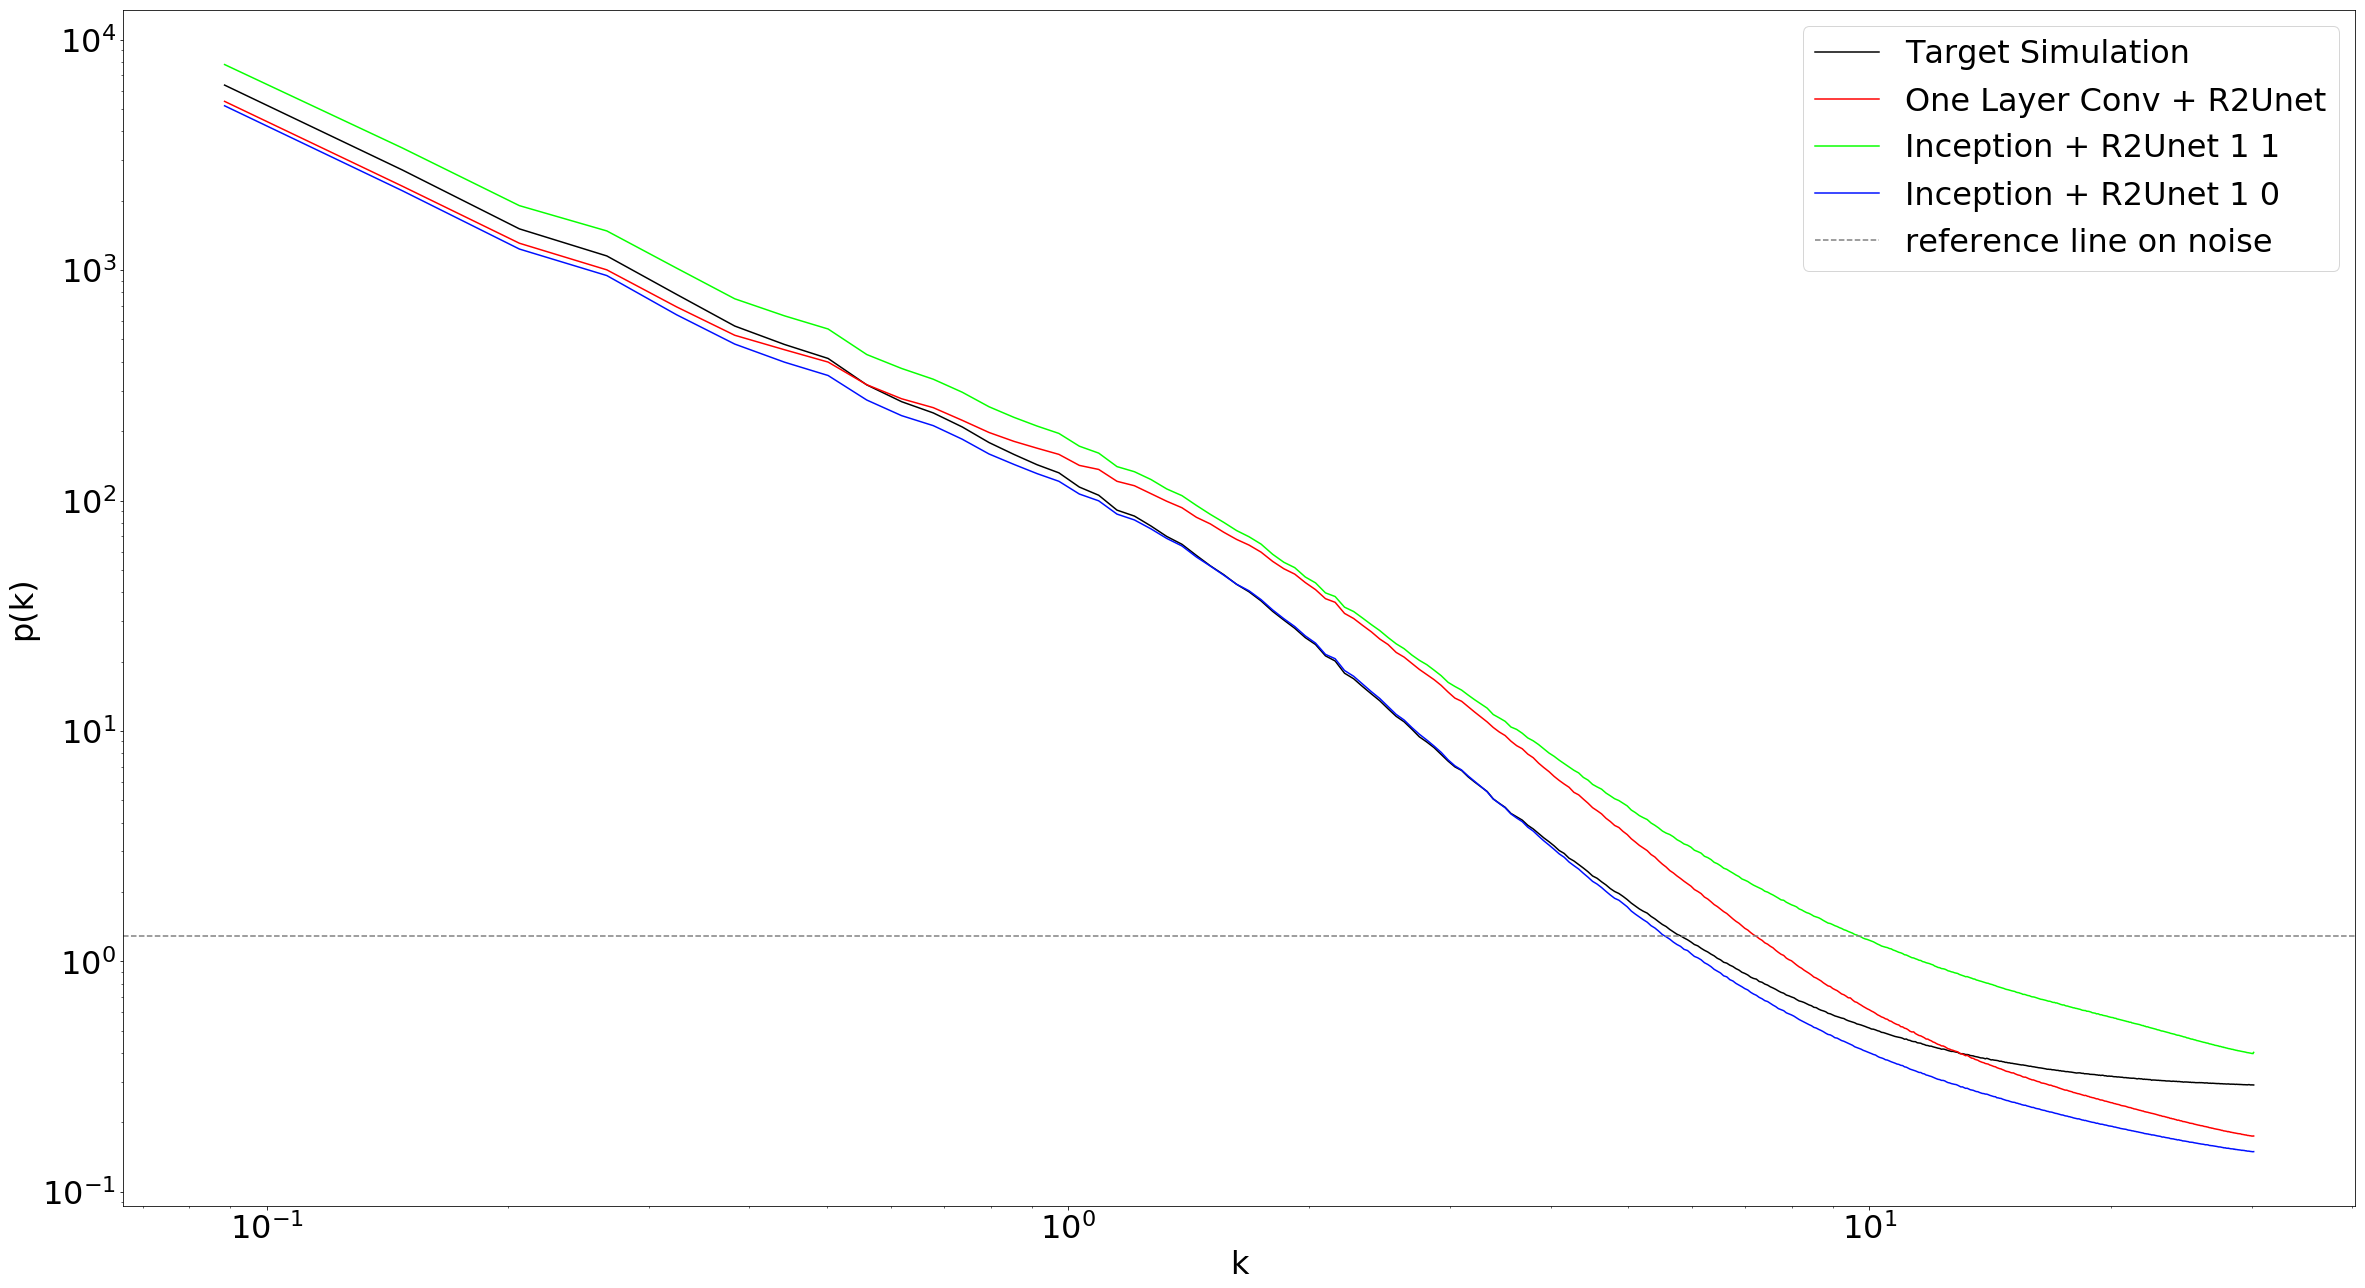

In [20]:
key_list = ['full_4_3_0','model_7_0.6@model_2@6@8@10_80_v0_n1.pth','model_7_0.6@model_2@6@8@10_80_v0_n0.pth']
label_list = ['One Layer Conv + R2Unet', 'Inception + R2Unet 1 1','Inception + R2Unet 1 0']
ps_plot(key_list, label_list)

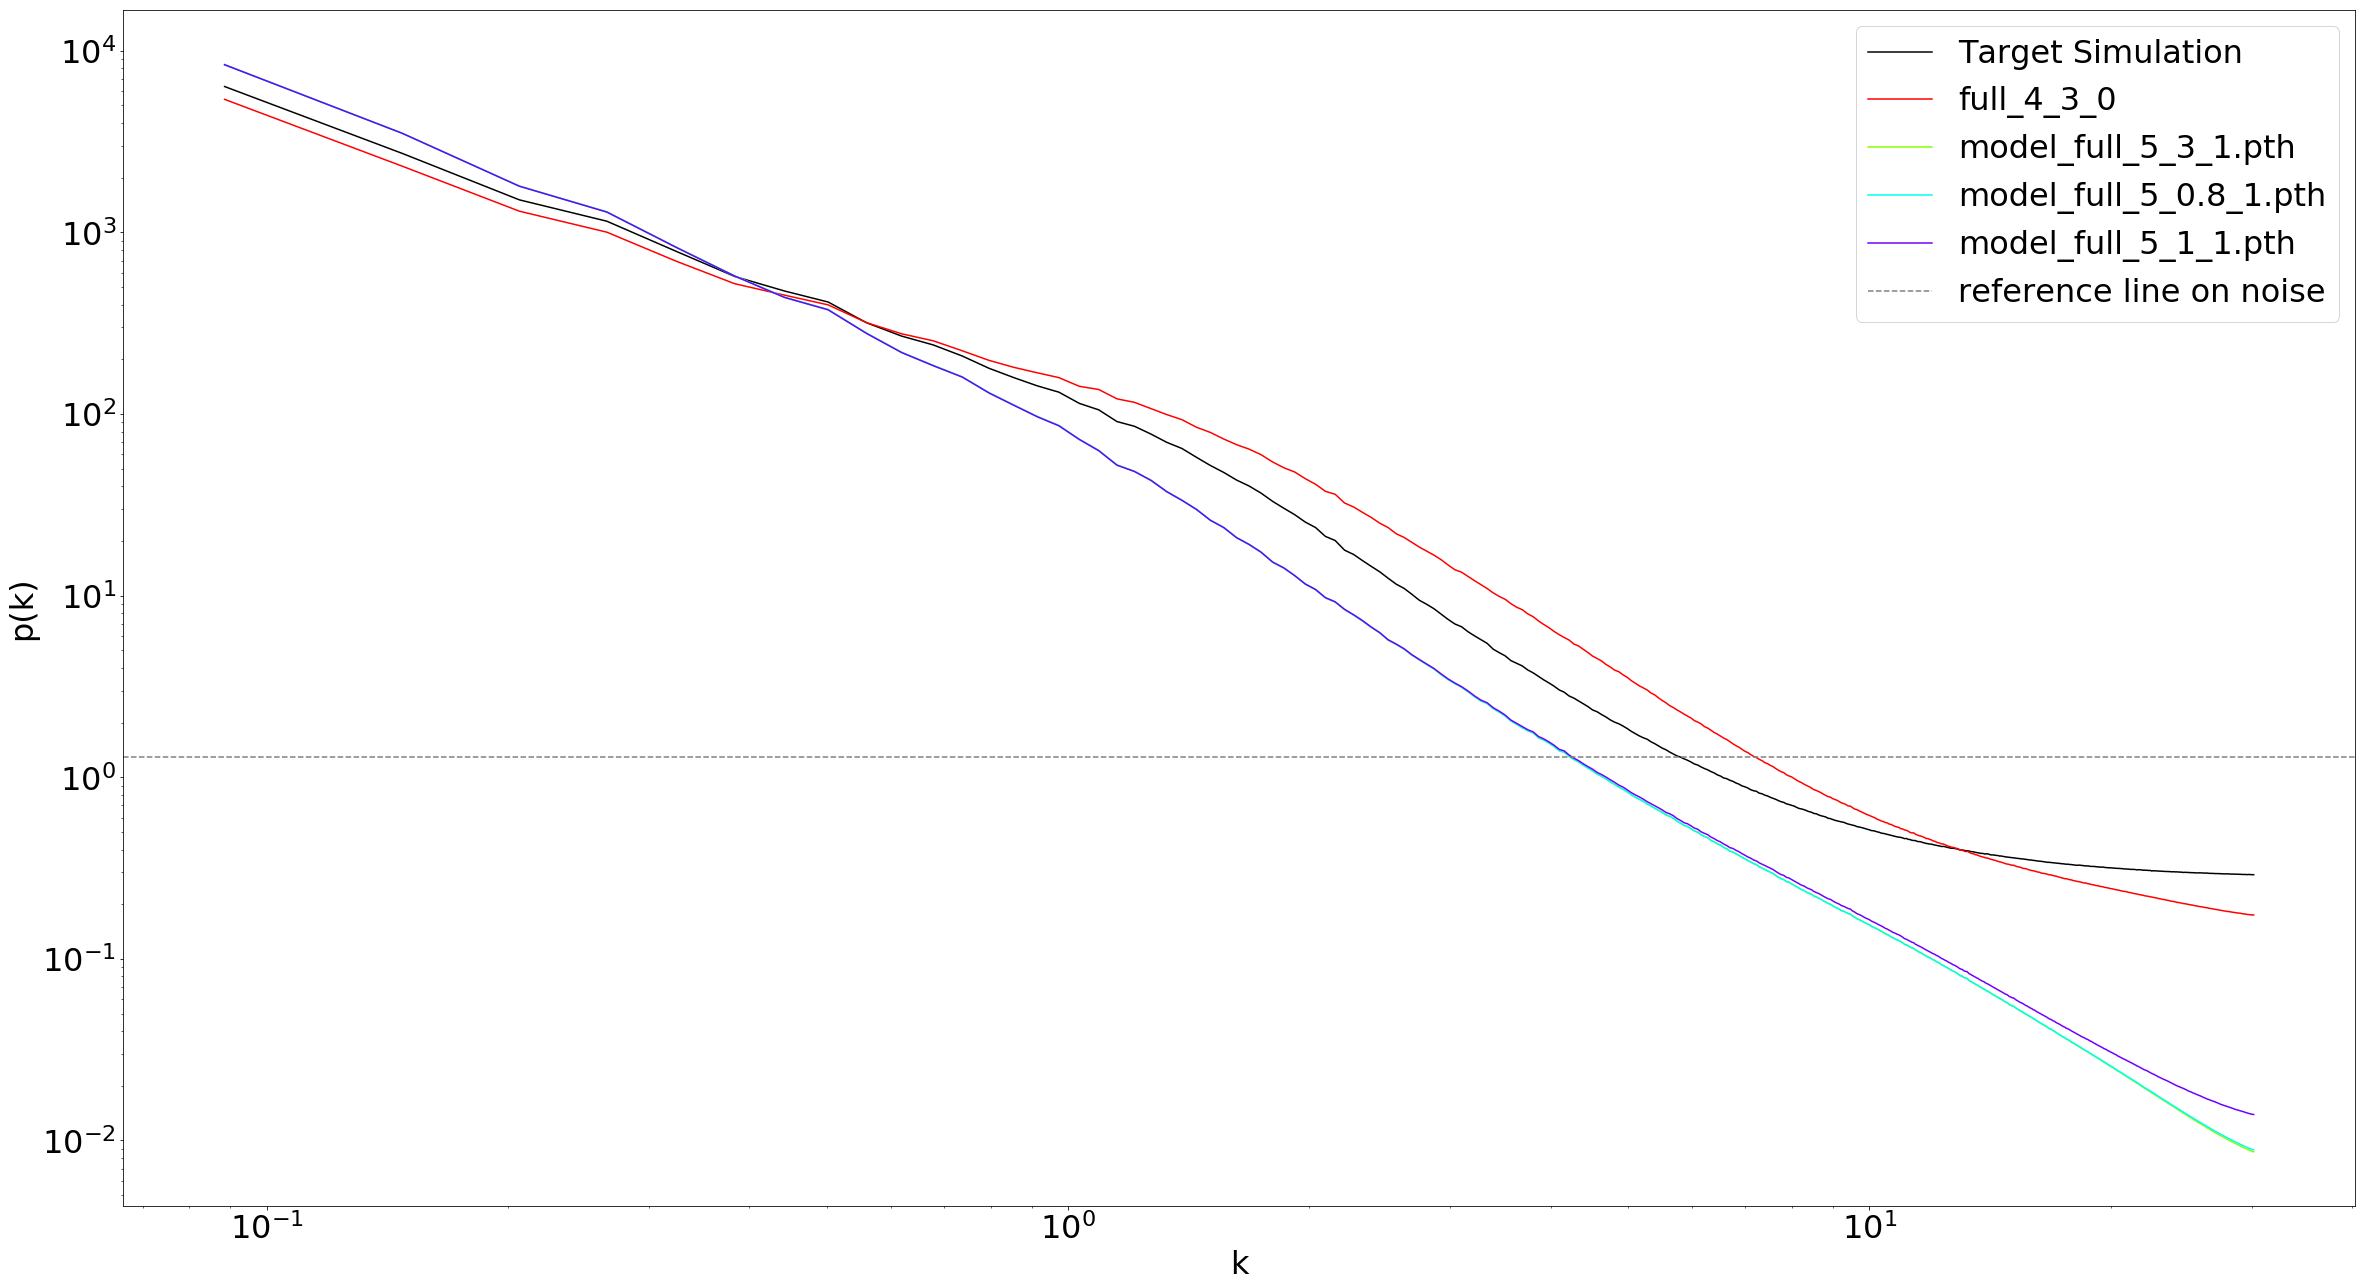

In [63]:
key_list = ['full_4_3_0','model_full_5_3_1.pth', 'model_full_5_0.8_1.pth','model_full_5_1_1.pth']
ps_plot(key_list)

In [ ]:
target=np.load('/scratch/xz2139/Target_R2Unet.npy')

In [ ]:
prediction2=np.load('/scratch/yw1007/dark_matter/predictions_full_4_1_0.npy')

In [ ]:
prediction5=np.load('/scratch/yw1007/dark_matter/predictions_full_4_5_0.npy')
prediction3=np.load('/scratch/yw1007/dark_matter/predictions_full_4_3_0.npy')

In [ ]:
predictionr2_0=np.load('/scratch/ys3202/predictions_model_full_5_1.pth.npy')
predictionr2_3=np.load('/scratch/ys3202/predictions_model_full_5_3.pth.npy')
predictionr2_5=np.load('/scratch/ys3202/predictions_model_full_5_5.pth.npy')

In [ ]:
p_k2,p_pk02=power_spectrum_np(prediction2,prediction2.mean(), 106.5)

p_k3,p_pk03=power_spectrum_np(prediction3,prediction3.mean(), 106.5)

p_k5,p_pk05=power_spectrum_np(prediction5,prediction5.mean(), 106.5)

p_k1r,p_pk01r=power_spectrum_np(predictionr2_0,predictionr2_0.mean(), 106.5)

p_k3r,p_pk03r=power_spectrum_np(predictionr2_3,predictionr2_3.mean(), 106.5)

p_k5r,p_pk05r=power_spectrum_np(predictionr2_5,predictionr2_5.mean(), 106.5)
t_k,t_pk0=power_spectrum_np(target,target.mean(), 106.5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
plt.figure(figsize=[10,5.5])
# plt.plot(p_k,p_pk0,label='R2Unet+R2Unet prediction',color='black')
plt.plot(t_k,t_pk0,label='Target Simulation',color='b')
plt.plot(p_k2,p_pk02,label='Conv+R2Unet Weight1 prediction',color='y',linestyle='-.')
plt.plot(p_k3,p_pk03,label='Conv+R2Unet Weight3 prediction',color='r',linestyle='-.')
plt.plot(p_k5,p_pk05,label='Conv+R2Unet Weight5 prediction',color='g',linestyle='-.')

plt.axhline(1.2850479100852299,linestyle='--',color='grey',label='reference line on noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[10,5.5])
# plt.plot(p_k,p_pk0,label='R2Unet+R2Unet prediction',color='black')
plt.plot(t_k,t_pk0,label='Target Simulation',color='b')
plt.plot(p_k1r,p_pk01r,label='R2Unet+R2Unet Weight1 prediction',color='y',linestyle='-.')
plt.plot(p_k3r,p_pk03r,label='R2Unet+R2Unet Weight3 prediction',color='r',linestyle='-.')
plt.plot(p_k5r,p_pk05r,label='R2Unet+R2Unet Weight5 prediction',color='g',linestyle='-.')
plt.plot(p_k3,p_pk03,label='Conv+R2Unet Weight3 prediction',color='c',linestyle='-.')
plt.axhline(1.2850479100852299,linestyle='--',color='grey',label='reference line on noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.legend()
plt.show()